# Izhikevich Model

The Izhikevich model produces biologically plausible dynamics of neural spiking (as the Hodgkin-Huxley model) but with the advantage of being computationally efficient (as the Integrate-and-Fire model) [[1]](#References). It is described by the following system of ordinary differential equations: 

\begin{align}
v' &= 0.04 v^2 + 5v + 140 - u + I \\
u' &= a(bv - u)
\end{align}

where $v$ denotes the membrane potential and $u$, its recovery variable. $a$, $b$, $c$ and $d$ are additional parameters accounting for:

* $a$: Time scale of recovery variable $u$.
* $b$: Sensitivity of recovery variable $u$.
* $c$: After-spike reset value of membrane potential $v$.
* $d$: After-spike reset value of recovery variable $u$.

Additionally, $u$ and $v$ are resetted when $u$ exceeds the threshold of 30mv:


$$
\begin{cases}
v \leftarrow c \\
u \leftarrow u + d
\end{cases}
$$

In [1]:
# Add temporary path to code
import sys
sys.path.append("../")

# Plots
import matplotlib.pyplot as plt 

# Import the module with the Izhikevich model
from neural_models import Izhikevich

Different dynamics can be accomplished by tuning the parameters appropriately:

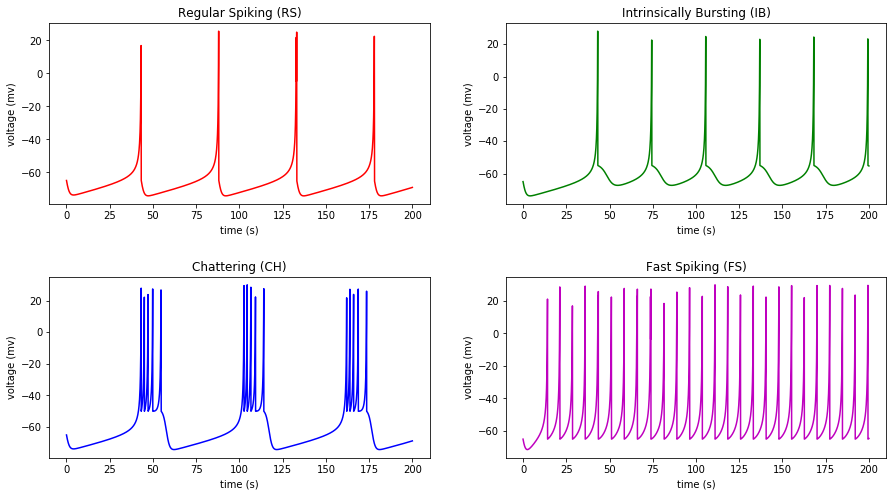

In [2]:
# Parameters
t = 200
current = 10
Y0 = [-65, 0]

#Regular Spiking (RS) Neuron
RS_model = Izhikevich(a=0.02, b=0.2, c=-65, d=8)
RS_model.run(t, current, Y0)

# Intrinsically Bursting (RS) Neuron
IB_model = Izhikevich(a=0.02, b=0.2, c=-55, d=4)
IB_model.run(t, current, Y0)

# Chattering (CH) Neuron
CH_model = Izhikevich(a=0.02, b=0.2, c=-50, d=2)
CH_model.run(t, current, Y0)

# Fast Spiking (FS) Neuron
FS_model = Izhikevich(a=0.1, b=0.2, c=-65, d=2)
FS_model.run(t, current, Y0)

# Plots
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
ax[0, 0].plot(RS_model.tvec, RS_model.V, 'r')
ax[0, 0].set_xlabel('time (s)')
ax[0, 0].set_ylabel('voltage (mv)')
ax[0, 0].set_title('Regular Spiking (RS)')

ax[0, 1].plot(IB_model.tvec, IB_model.V, 'g')
ax[0, 1].set_xlabel('time (s)')
ax[0, 1].set_ylabel('voltage (mv)')
ax[0, 1].set_title('Intrinsically Bursting (IB)')

ax[1, 0].plot(CH_model.tvec, CH_model.V, 'b')
ax[1, 0].set_xlabel('time (s)')
ax[1, 0].set_ylabel('voltage (mv)')
ax[1, 0].set_title('Chattering (CH)')

ax[1, 1].plot(FS_model.tvec, FS_model.V, 'm')
ax[1, 1].set_xlabel('time (s)')
ax[1, 1].set_ylabel('voltage (mv)')
ax[1, 1].set_title('Fast Spiking (FS)')

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

# References

## Bibliography
1. [Simple Model of Spiking Neurons](https://www.izhikevich.org/publications/spikes.pdf)